In [153]:
import numpy as np
import pandas as pd
import os

coke = ['data_ml/'+f for f in os.listdir('data_ml/') if 'coke' in f]
saline = ['data_ml/'+f for f in os.listdir('data_ml/') if 'saline' in f]

coke_data = [pd.read_csv(f).drop(labels=['Unnamed: 0'], axis=1) for f in coke]
saline_data = [pd.read_csv(f).drop(labels=['Unnamed: 0'], axis=1) for f in saline]

In [155]:
df = coke_data[0]
for i in range(len(coke_data)-1):
    df = df.merge(coke_data[i+1], on='trial_n', how='inner')
df_coke = df

df = saline_data[0]
for i in range(len(saline_data)-1):
    df = df.merge(saline_data[i+1], on='trial_n', how='inner')
df_saline = df

df_coke['label'] = 'coke'
df_saline['label'] = 'saline'

df = pd.concat([df_coke, df_saline])
df

,trial_n,HPC_beta_hi_e,HPC_beta_hi_l,HPC_gamma_lo_e,HPC_gamma_lo_l,HPC_gamma_mid_e,HPC_gamma_mid_l,HPC_gamma_hi_e,HPC_gamma_hi_l,theta_ispc_e,...,PFC_gamma_hi_l,HPC_delta_e,HPC_delta_l,HPC_theta_e,HPC_theta_l,HPC_alpha_e,HPC_alpha_l,HPC_beta_lo_e,HPC_beta_lo_l,label
0,Ephys11_rat1_trial3,1.068518,0.708834,1.416006,0.914051,1.770409,1.459211,2.236279,0.823450,0.933712,...,1.159002,1.451246,0.651968,1.409223,1.957923,1.698677,0.873065,2.996300,1.650027,coke
1,Ephys11_rat1_trial5,1.353125,1.008216,0.525447,0.668730,0.659680,1.153864,1.530859,0.638536,0.969482,...,2.411314,0.527992,0.798669,2.593818,1.579255,2.117801,0.660050,0.476531,0.698164,coke
2,Ephys11_rat1_trial6,2.203154,1.056632,1.254921,1.993915,0.313219,0.837855,0.318001,1.082905,0.888647,...,3.035711,0.370975,0.603575,1.285037,2.040748,3.111454,1.459721,0.647974,0.507154,coke
3,Ephys11_rat1_trial7,0.236947,0.573674,2.579863,1.297780,2.059551,1.436436,0.858867,2.473318,0.993244,...,2.033879,0.306568,0.352373,0.912831,2.621212,0.668104,2.100383,1.254038,3.734254,coke
4,Ephys11_rat1_trial10,1.535195,0.720501,1.025565,1.090089,0.802164,0.709167,1.279446,0.725600,0.938416,...,2.892353,1.703592,0.927768,0.780218,1.173276,0.926458,0.604138,0.510317,0.820307,coke
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
105,Ephys9_rat1_trial29,1.038786,0.905508,0.600404,1.167414,0.202809,0.752905,0.612620,0.937095,0.844497,...,1.975647,0.814589,1.956629,0.648874,0.849748,3.792608,3.748215,0.805953,0.699065,saline
106,Ephys9_rat1_trial30,2.137346,1.378734,3.978986,2.355777,1.016023,1.206306,0.287102,1.792439,0.805406,...,2.921621,1.804442,4.479938,0.745669,2.378635,0.100565,1.207441,0.804753,0.849501,saline
107,Ephys9_rat1_trial31,0.313450,0.905147,2.162227,1.128755,1.786703,0.462079,1.368112,0.530523,0.867974,...,2.209825,1.136873,0.802013,1.025636,0.665928,8.068981,3.860686,1.417142,1.499355,saline
108,Ephys9_rat1_trial32,1.220690,0.965357,1.076615,0.704175,2.420966,1.365933,0.743397,1.625042,0.938829,...,0.360491,0.452319,1.879006,1.008930,1.514150,0.251458,0.435848,0.379426,0.706790,saline


In [218]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

features = [c for c in list(df.columns) if not c == 'trial_n' and not c == 'label']

# Separating out the features
x = df.loc[:, features].values

# Separating out the target
y = df.loc[:,['label']].values

# Standardizing the features
x = StandardScaler().fit_transform(x)

n=45
pca = PCA(n_components=n)
principalComponents = pca.fit_transform(x)


principalDf = pd.DataFrame(data = principalComponents, columns = [f'pc{i+1}' for i in range(n)])

df.reset_index(inplace=True, drop=True)
final_df = pd.concat([principalDf, df[['label']]], axis = 1)

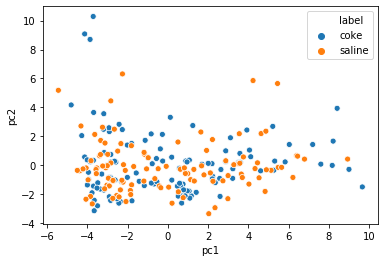

In [219]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.scatterplot('pc1', 'pc2', data=final_df, hue='label')

plt.show()

In [220]:
print(pca.explained_variance_ratio_.cumsum())

[0.17369817 0.23565237 0.28275722 0.3258874  0.36607352 0.40107899
 0.4339667  0.46393634 0.49231667 0.52036862 0.5469416  0.57165764
 0.59462115 0.61633057 0.63748415 0.65737535 0.67654372 0.69459358
 0.71136007 0.72727593 0.74186489 0.75621443 0.77021823 0.78351339
 0.79654977 0.80858644 0.81978588 0.8306505  0.84102682 0.85096392
 0.86047248 0.86948739 0.87839427 0.88642306 0.8938841  0.90101554
 0.90799651 0.91456891 0.92082768 0.92666506 0.93225741 0.93779827
 0.942933   0.94779391 0.95226864]


/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/t_sne.py:344: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  error = np.finfo(np.float).max
/opt/anaconda3/lib/python3.7/site-packages/sklearn/manifold/t_sne.py:345: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  best_error = np.finfo(np.float).max
/opt/anaconda3/lib/python3.7/site

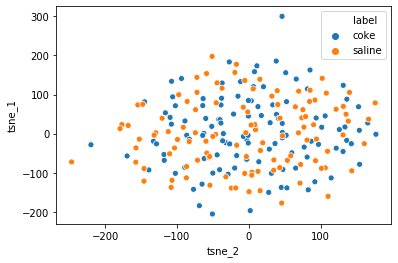

In [252]:
from sklearn.manifold import TSNE
from matplotlib import pyplot
tsne = TSNE(n_components=3, random_state=17)
%matplotlib inline

X_tsne = tsne.fit_transform(x)

df_tsne = pd.DataFrame()
df_tsne['tsne_1'] = X_tsne[:, 0]
df_tsne['tsne_2'] = X_tsne[:, 1]
df_tsne['tsne_3'] = X_tsne[:, 2]
df_tsne = pd.concat([df_tsne, df[['label']]], axis = 1)
sns.scatterplot('tsne_2', 'tsne_1', data=df_tsne, hue='label')

In [254]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure
%matplotlib widget
 
fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(df_tsne)): #plot each point + it's index as text above
    if df_tsne.iloc[i]['label'] == 'coke':
        c = 'red'
    else:
        c = 'blue'
    ax.scatter(df_tsne.iloc[i][0],df_tsne.iloc[i][1],df_tsne.iloc[i][2],color=c) 

ax.set_xlabel('tsne_1')
ax.set_ylabel('tsne_2')
ax.set_zlabel('tsne_3')
pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [255]:
from matplotlib import pyplot
from mpl_toolkits.mplot3d import Axes3D
from numpy.random import rand
from pylab import figure
%matplotlib widget
 
 
fig = figure()
ax = fig.add_subplot(projection='3d')

for i in range(len(final_df)): #plot each point + it's index as text above
    if final_df.iloc[i]['label'] == 'coke':
        c = 'red'
    else:
        c = 'blue'
    ax.scatter(final_df.iloc[i][0],final_df.iloc[i][1],final_df.iloc[i][2],color=c) 

ax.set_xlabel('pc_1')
ax.set_ylabel('pc_2')
ax.set_zlabel('pc_3')
pyplot.show()

Canvas(toolbar=Toolbar(toolitems=[('Home', 'Reset original view', 'home', 'home'), ('Back', 'Back to previous …

In [9]:
import numpy as np

arr = np.arange(100)
print(np.reshape(arr, (10,10)).mean(axis=0))
print(np.reshape(arr, (10,10)).mean(axis=1))

[45. 46. 47. 48. 49. 50. 51. 52. 53. 54.]
[ 4.5 14.5 24.5 34.5 44.5 54.5 64.5 74.5 84.5 94.5]


In [7]:
np.reshape(arr,(10,10))

array([[ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9],
       [10, 11, 12, 13, 14, 15, 16, 17, 18, 19],
       [20, 21, 22, 23, 24, 25, 26, 27, 28, 29],
       [30, 31, 32, 33, 34, 35, 36, 37, 38, 39],
       [40, 41, 42, 43, 44, 45, 46, 47, 48, 49],
       [50, 51, 52, 53, 54, 55, 56, 57, 58, 59],
       [60, 61, 62, 63, 64, 65, 66, 67, 68, 69],
       [70, 71, 72, 73, 74, 75, 76, 77, 78, 79],
       [80, 81, 82, 83, 84, 85, 86, 87, 88, 89],
       [90, 91, 92, 93, 94, 95, 96, 97, 98, 99]])

In [14]:
np.reshape(arr, (10,10)).T.mean(axis=1)

array([45., 46., 47., 48., 49., 50., 51., 52., 53., 54.])

In [15]:
type([0])

list